# **Lab 2** - Image Processing in Frequency Domain
#### Pengcit B
#### Ardian
#### 2106638173

## Libraries

In [1]:
from skimage import color, io, util
import matplotlib.pyplot as plt
import numpy as np
from scipy import fftpack as fp
from helper import *

## 1. Terapkan minimal dua Low Pass dan High Pass Filter terhadap citra ”fanum look alike.jpg”, dan gunakan dua nilai D0 (parameter fungsi lpfilter dan hpfilter) yang berbeda pada masing-masing filter!

In [2]:
fgla = io.imread('fanum_look_alike.jpg')

In [3]:
def pass_filter(image, filter, type, D0, in_frequency = False):
    w , l = paddedsize(image.shape[0], image.shape[1])

    h = lpfilter(type, w, l, D0 * w)
    if filter == "high":
        h = hpfilter(type, w, l, D0 * w)

    f = fp.fft2 (image, (w, l))

    PFS_image = h * f
    PF_image = fp.ifft2(PFS_image).real
    PF_image = PF_image[:image.shape[0], :image.shape[1]]
    
    Fcf = fp.fftshift(PFS_image)
    S = np.log(1 + abs(Fcf))

    if in_frequency:
        return S
    return PF_image

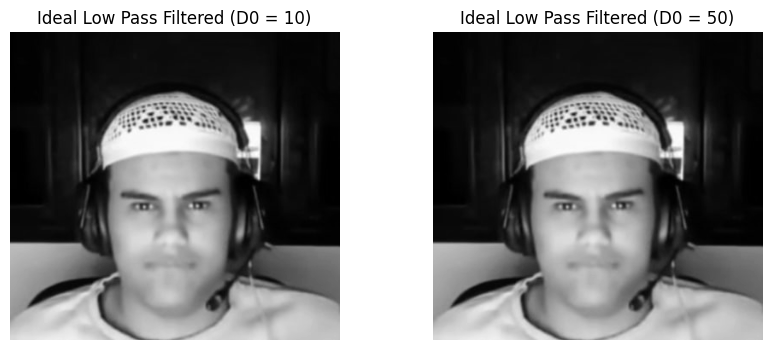

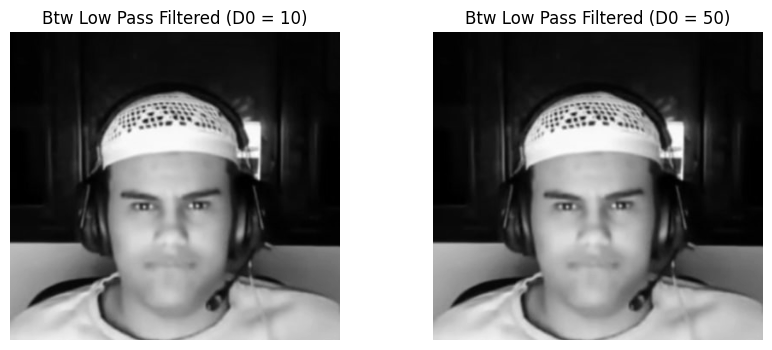

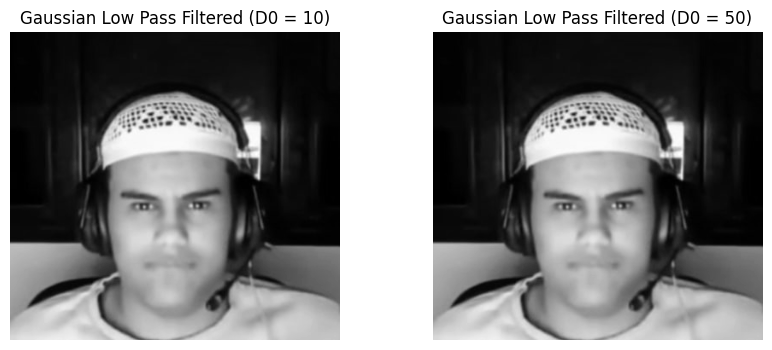

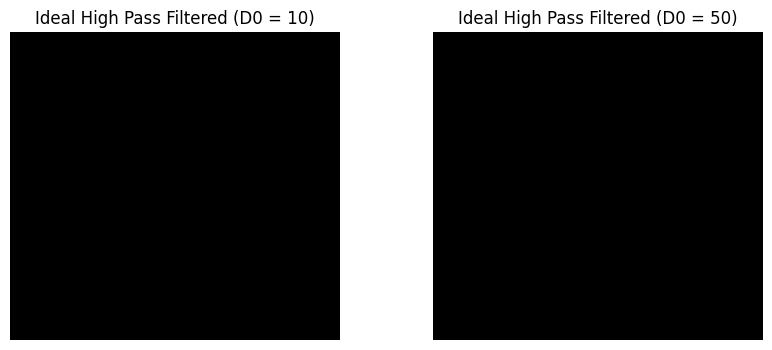

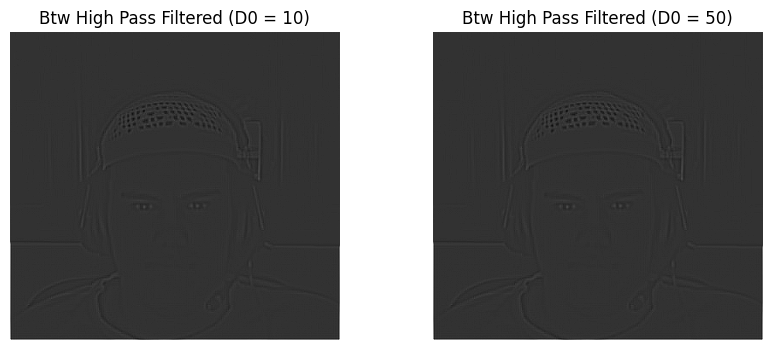

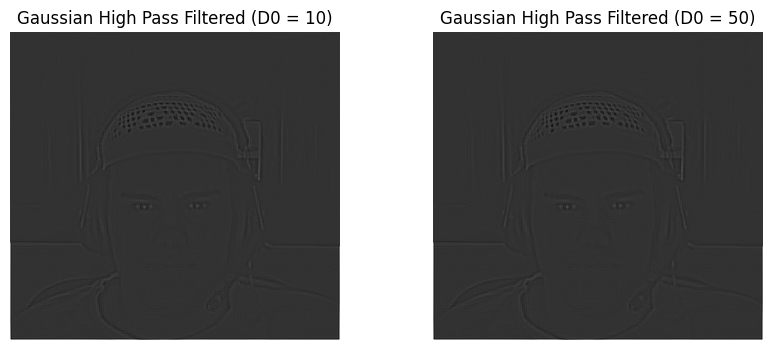

In [4]:
image = color.rgb2gray(fgla)

filters = ['low', 'high']
filter_types = ['ideal', 'btw', 'gaussian']
D0s = [10, 50]
    
for filter in filters:
    for type in filter_types:
        PF_image = pass_filter(image, filter, type, D0s[0])

        plt.figure(figsize=(10, 4))

        # D0 = 0.1
        plt.subplot(1, 2, 1)
        plt.imshow(PF_image, cmap='gray')
        plt.title(f"{type} {filter} Pass Filtered (D0 = {D0s[0]})".title())
        plt.axis("off")

        PF_image = pass_filter(image, filter, type, D0s[1])

        # D0 = 0.05
        plt.subplot(1, 2, 2)
        plt.imshow(PF_image, cmap='gray')
        plt.title(f"{type} {filter} Pass Filtered (D0 = {D0s[1]})".title())
        plt.axis("off")

        plt.show()

### a. Tampilkan citra pada domain frekuensi!

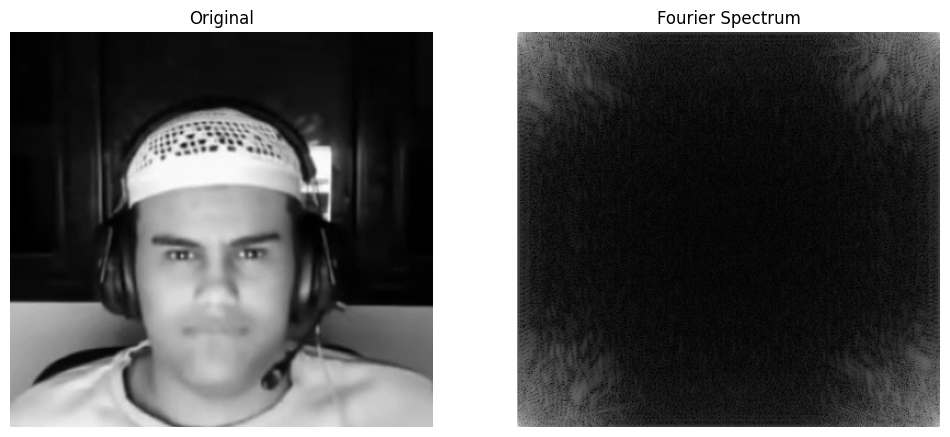

In [5]:
image = color.rgb2gray(fgla)
ft = fp.fft2(image)
ft_norm = abs(ft)
ft_scale = np.log(1 + ft_norm)


plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Original')
plt.axis('off')

# Fourier Transform Result
plt.subplot(1, 2, 2)
plt.imshow(ft_scale, cmap="gray")
plt.title('Fourier Spectrum')
plt.axis('off')

plt.show()

### b. Tampilkan citra pada domain spasial dan frekuensi dari citra hasil penerapan Low Pass Filter dan jelaskan perbedaannya!

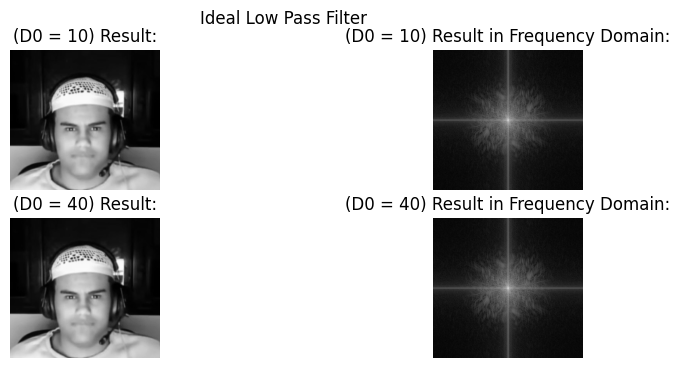

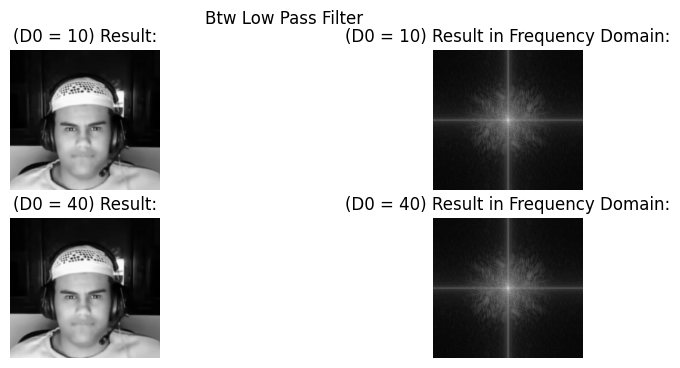

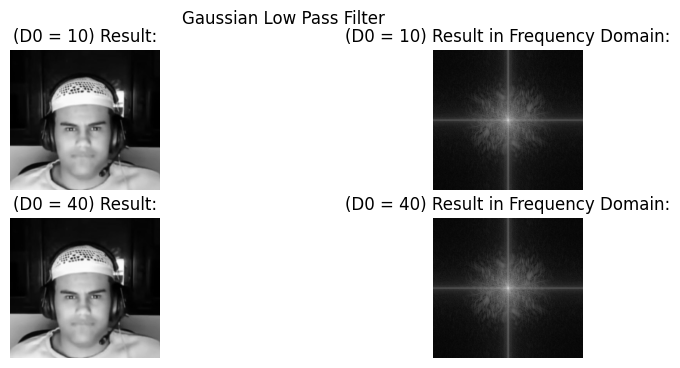

In [6]:
image = color.rgb2gray(fgla)

filter = 'low'
filter_types = ['ideal', 'btw', 'gaussian']
D0s = [10, 40]

for type in filter_types:
    # D0 = 0.1    
    PF_image = pass_filter(image, filter, type, D0s[0])
    S = pass_filter(image, filter, type, D0s[0], True)

    plt.figure(figsize=(10, 4))

    # Image Result
    plt.subplot(2, 2, 1)
    plt.imshow(PF_image, cmap='gray')
    plt.title(f"(D0 = {D0s[0]}) Result:")
    plt.axis("off")

    # Image Result in frequency domain
    plt.subplot(2, 2, 2)
    plt.imshow(S, cmap='gray')
    plt.title(f"(D0 = {D0s[0]}) Result in Frequency Domain:")
    plt.axis("off")

    # D0 = 0.05
    PF_image = pass_filter(image, filter, type, D0s[1])
    S = pass_filter(image, filter, type, D0s[1], True)

    # Image Result
    plt.subplot(2, 2, 3)
    plt.imshow(PF_image, cmap='gray')
    plt.title(f"(D0 = {D0s[1]}) Result:")
    plt.axis("off")

    # Image Result in frequency domain
    plt.subplot(2, 2, 4)
    plt.imshow(S, cmap='gray')
    plt.title(f"(D0 = {D0s[1]}) Result in Frequency Domain:")
    plt.axis("off")

    plt.suptitle(f"{type} {filter} Pass Filter".title())

    plt.show()

Komponen yang berfrekuensi rendah menjadi tinggi, dan komponen berfrekuensi tinggi menjad rendah dan bahkan hilang

### c. Tampilkan citra pada domain spasial dan frekuensi dari citra hasil penerapan High Pass Filter dan jelaskan perbedaannya!

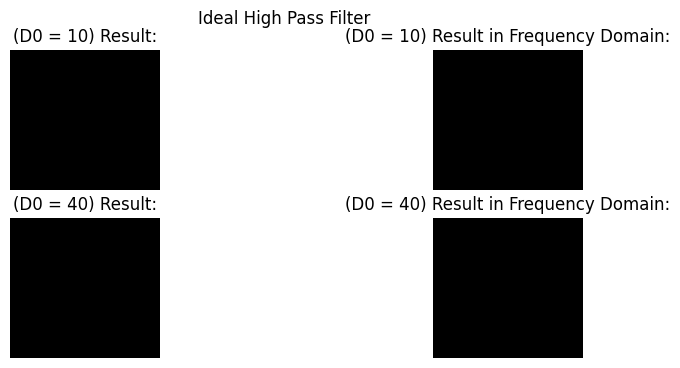

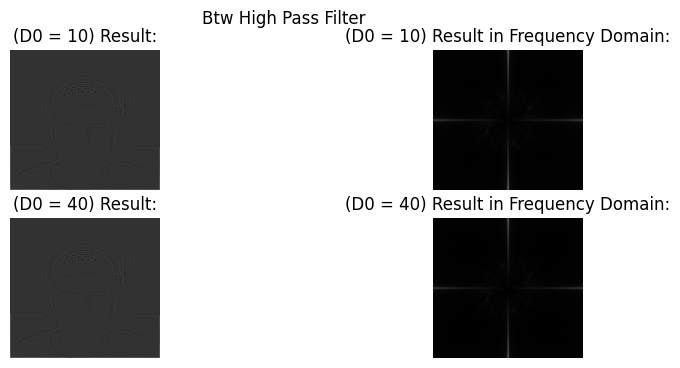

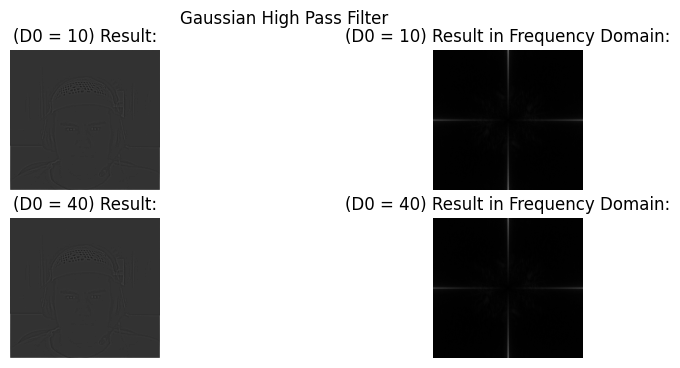

In [7]:
image = color.rgb2gray(fgla)

filter = 'high'
filter_types = ['ideal', 'btw', 'gaussian']
D0s = [10, 40]

for type in filter_types:
    # D0 = 0.1    
    PF_image = pass_filter(image, filter, type, D0s[0])
    S = pass_filter(image, filter, type, D0s[0], True)

    plt.figure(figsize=(10, 4))

    # Image Result
    plt.subplot(2, 2, 1)
    plt.imshow(PF_image, cmap='gray')
    plt.title(f"(D0 = {D0s[0]}) Result:")
    plt.axis("off")

    # Image Result in frequency domain
    plt.subplot(2, 2, 2)
    plt.imshow(S, cmap='gray')
    plt.title(f"(D0 = {D0s[0]}) Result in Frequency Domain:")
    plt.axis("off")

    # D0 = 0.05
    PF_image = pass_filter(image, filter, type, D0s[1])
    S = pass_filter(image, filter, type, D0s[1], True)

    # Image Result
    plt.subplot(2, 2, 3)
    plt.imshow(PF_image, cmap='gray')
    plt.title(f"(D0 = {D0s[1]}) Result:")
    plt.axis("off")

    # Image Result in frequency domain
    plt.subplot(2, 2, 4)
    plt.imshow(S, cmap='gray')
    plt.title(f"(D0 = {D0s[1]}) Result in Frequency Domain:")
    plt.axis("off")

    plt.suptitle(f"{type} {filter} Pass Filter".title())

    plt.show()

Hampir seluruh komponen direndahkan/dihilangkan

### d. Lakukan analisis dan berikan kesimpulan dari nilai D0 yang digunakan pada bagian (b) dan (c)!

Terdapat perbedaan range penentuan nilai D0 antara high pass dan low pass filter. Bisa dilihat, dengan DO 10 dan 40, low pass menghasilkan gambar yang lebih halus, sementara high pass menghasilkan gambar yang terlalu tajam hingga menjadi seperti blank

## 2. Swiss

In [8]:
swiss = io.imread('swiss.jpg')

### a. Tampilkan citra tersebut pada domain frekuensi!

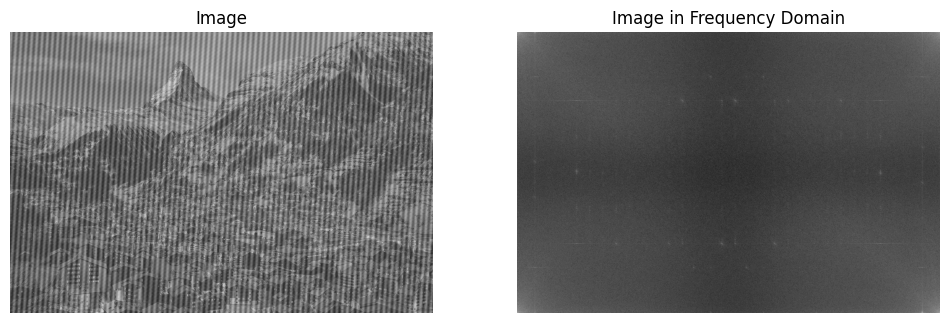

In [9]:
image = color.rgb2gray(swiss)
ft = fp.fft2(image)
ft_norm = abs(ft)
ft_scale = np.log(1 + ft_norm)


plt.figure(figsize=(12, 8))

# Original Image
plt.subplot(1, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Image')
plt.axis('off')

# Fourier Transform Result
plt.subplot(1, 2, 2)
plt.imshow(ft_scale, cmap="gray")
plt.title('Image in Frequency Domain')
plt.axis('off')

plt.show()

### b. Lakukan filtering yang tepat untuk mereduksi noise yang ada dan jelaskan mengapa anda memilih melakukan filtering tersebut!

In [10]:
image = color.rgb2gray(swiss)
image

array([[0.50980392, 0.5372549 , 0.56470588, ..., 0.5372549 , 0.52156863,
        0.49803922],
       [0.4       , 0.50196078, 0.63137255, ..., 0.41568627, 0.53333333,
        0.65098039],
       [0.47058824, 0.54117647, 0.61568627, ..., 0.51764706, 0.62352941,
        0.69803922],
       ...,
       [0.12941176, 0.15294118, 0.18823529, ..., 0.25098039, 0.29411765,
        0.35294118],
       [0.25098039, 0.21568627, 0.16078431, ..., 0.31764706, 0.28627451,
        0.24705882],
       [0.33333333, 0.24313725, 0.11764706, ..., 0.41568627, 0.30196078,
        0.16862745]])

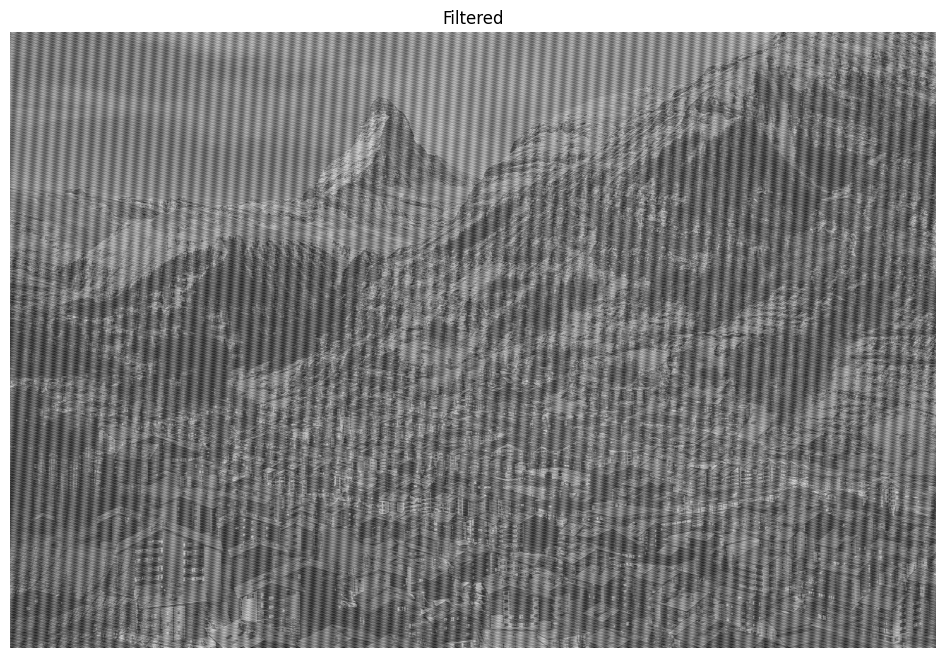

In [11]:
image = color.rgb2gray(swiss)

w, l = paddedsize(image.shape[0], image.shape[1])
F = fp.fft2(util.img_as_float(image), (w, l))

Fc = fp.fftshift(F)

x = 100
y = 50

H1 = notch('btw', w, l, 30, -x, y)
H2 = notch('btw', w, l, 30, x, -y)

FS_image = F * H1 * H2

F_image = fp.ifft2(FS_image).real
F_image = F_image[:image.shape[0], :image.shape[1]]

Fcf = fp.fftshift(F_image)
S = np.log(1 + abs(Fcf))

plt.figure(figsize=(12, 8))
plt.imshow(F_image, cmap="gray")
plt.title('Filtered')
plt.axis('off')
plt.show()

Pilihan filter yang sesuai adalah notch filter karena terdapat noise vertikal yang berulang dalam gambar. Meskipun demikian, saya mengalami kesulitan dalam menentukan nilai yang akurat untuk variabel x dan y. Saya harus meningkatkan pemahaman saya tentang domain frekuensi dan notch filter agar bisa menentukan nilai x dan y yang tepat untuk kedepannya.

### c. Tampilkan perbandingan citra sebelum dan sesudah filtering pada domain spasial dan frekuensi serta ceritakan hasilnya!

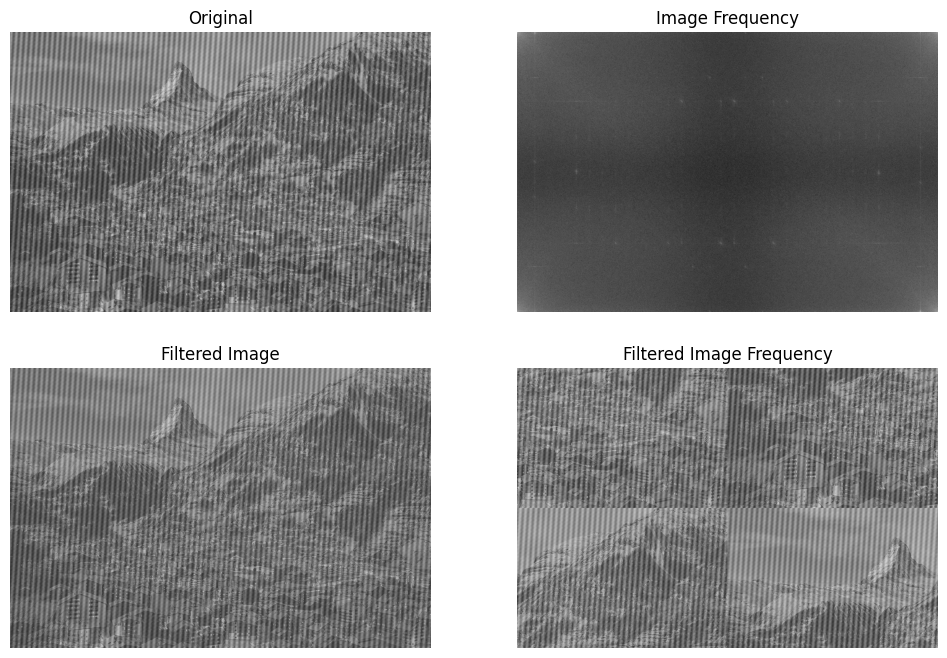

In [14]:
image = color.rgb2gray(swiss)

ft = fp.fft2(image)
ft_norm = abs(ft)
ft_scale = np.log(1 + ft_norm)

w, l = paddedsize(image.shape[0], image.shape[1])
F = fp.fft2(util.img_as_float(image), (w, l))

Fc = fp.fftshift(F)

x = 100
y = 50

H1 = notch('btw', w, l, 30, -x, y)
H2 = notch('btw', w, l, 30, x, -y)

FS_image = F * H1 * H2

F_image = fp.ifft2(FS_image).real
F_image = F_image[:image.shape[0], :image.shape[1]]

Fcf = fp.fftshift(F_image)
S = np.log(1 + abs(Fcf))

plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
plt.imshow(image, cmap="gray")
plt.title('Original')
plt.axis('off')

plt.subplot(2, 2, 2)
plt.imshow(ft_scale, cmap="gray")
plt.title('Image Frequency')
plt.axis('off')

plt.subplot(2, 2, 3)
plt.imshow(F_image, cmap="gray")
plt.title('Filtered Image')
plt.axis('off')

plt.subplot(2, 2, 4)
plt.imshow(S, cmap="gray")
plt.title('Filtered Image Frequency')
plt.axis('off')

plt.show()

Tidak terdapat perbedaan yang mencolok dalam hasil yang lebih baik, ini disebabkan oleh pengaruh dari penentuan variabel D0, x, dan y terhadap hasil filtering. Penentuan variabel dengan lebih cermat akan menghasilkan hasil filtering yang lebih baik dan sesuai dengan harapan.